### Simple 1D Kernel Density Estimation(一维数据)
- http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

This example uses the `sklearn.neighbors.KernelDensity` class to demonstrate the principles of Kernel Density Estimation in one dimension.

The first plot shows one of the problems with using histograms to visualize the density of points in 1D. Intuitively, a histogram can be thought of as a scheme in which a unit “block” is stacked above each point on a regular grid. As the top two panels show, however, the choice of gridding for these blocks can lead to wildly divergent ideas about the underlying shape of the density distribution. If we instead center each block on the point it represents, we get the estimate shown in the bottom left panel. This is a kernel density estimation with a “top hat” kernel. This idea can be generalized to other kernel shapes: the bottom-right panel of the first figure shows a Gaussian kernel density estimate over the same distribution.

Scikit-learn implements efficient kernel density estimation using either a Ball Tree or KD Tree structure, through the `sklearn.neighbors.KernelDensity` estimator. The available kernels are shown in the second figure of this example.

The third figure compares kernel density estimates for a distribution of 100 samples in 1 dimension. Though this example uses 1D distributions, kernel density estimation is easily and efficiently extensible to higher dimensions as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [7]:
#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]  # 从array变成了matrix, 形状从(20, )变成了(20, 1)
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

In [13]:
X.shape

(20, 1)

In [14]:
bins

array([ -5.        ,  -3.33333333,  -1.66666667,   0.        ,
         1.66666667,   3.33333333,   5.        ,   6.66666667,
         8.33333333,  10.        ])

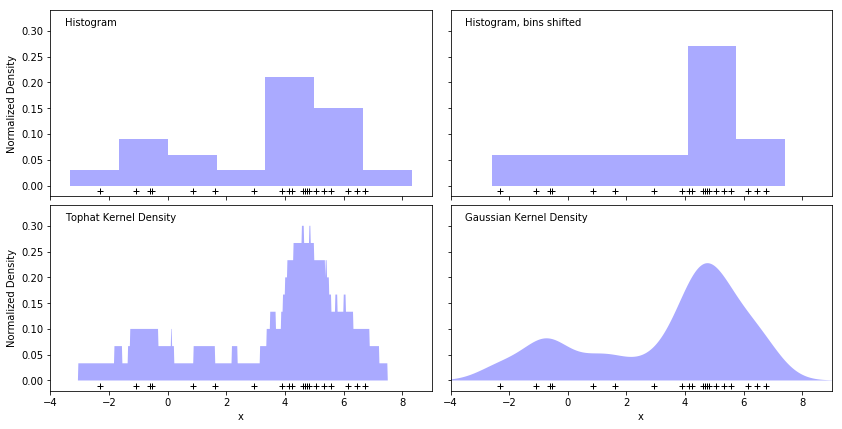

In [11]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")  # 每个子图都有自己的坐标系

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")  

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

In [15]:
kde.

Type:        KernelDensity
String form:
KernelDensity(algorithm='auto', atol=0, bandwidth=0.75, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)
File:        /opt/conda/lib/python3.6/site-packages/sklearn/neighbors/kde.py
Docstring:  
Kernel Density Estimation

Read more in the :ref:`User Guide <kernel_density>`.

Parameters
----------
bandwidth : float
    The bandwidth of the kernel.

algorithm : string
    The tree algorithm to use.  Valid options are
    ['kd_tree'|'ball_tree'|'auto'].  Default is 'auto'.

kernel : string
    The kernel to use.  Valid kernels are
    ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    Default is 'gaussian'.

metric : string
    The distance metric to use.  Note that not all metrics are
    valid with all algorithms.  Refer to the documentation of
    :class:`BallTree` and :class:`KDTree` for a description of
    available algorithms.  Note that the normalization 